# Objetivo:

Establecer los elementos mínimos del lenguaje $\texttt{Python}$, que son base para programar métodos numéricos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import IFrame, display

In [2]:
file = 'feynman.jpeg'
IFrame(file, width=400, height=400) 

In [3]:
# Listas 

mylist = [ 3.15,2.35,6.89,4.52,3.32 ]
print(mylist)

[3.15, 2.35, 6.89, 4.52, 3.32]


In [4]:
print(mylist[1],mylist[-1], mylist[:])

2.35 3.32 [3.15, 2.35, 6.89, 4.52, 3.32]


In [5]:
print(mylist[0:2], mylist[:2], mylist[2:])

[3.15, 2.35] [3.15, 2.35] [6.89, 4.52, 3.32]


In [6]:
mylist.insert(2,5.63)
mylist.append(6.35995)
mylist.insert(-1,100)
print(mylist)

[3.15, 2.35, 5.63, 6.89, 4.52, 3.32, 100, 6.35995]


In [8]:
# Leer 
file1 = 'Data/data1.dat'
data = np.loadtxt(file1)
print(data)

[[  1.    1.    0.9]
 [  2.    2.2   7.8]
 [  3.    2.5  27.5]
 [  4.    4.4  67. ]
 [  5.    6.  130. ]]


In [9]:
tiempo = data[:,0]
x = data[:,1]
y = data[:,2]

print(tiempo,x,y)

[1. 2. 3. 4. 5.] [1.  2.2 2.5 4.4 6. ] [  0.9   7.8  27.5  67.  130. ]


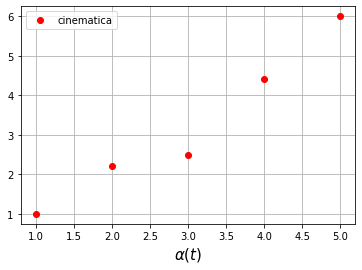

In [10]:

plt.plot(tiempo, x, 'ro', label='cinematica')

plt.xlabel(r'$\alpha(t)$', fontsize=15)
plt.grid()
plt.legend()
plt.savefig('xvst.pdf')

In [11]:
#!pip install numpy # Instruccion de la shell
!ls -Ra
#touch .gitkeep

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


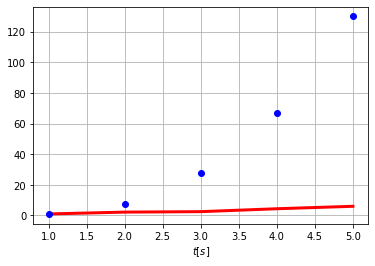

In [12]:
fig, ax = plt.subplots()
p1 = ax.plot(tiempo,x,'r', linewidth=3)
p2 = ax.plot(tiempo,y,'bo')

ax.set_xlabel(r"$t[s]$")
plt.grid()

# Nuclear Decay

$$ N(t) = N_{0}e^{-\alpha t}  $$

In [13]:
# c++ std::cout 

def Funcion(t, N0_, alpha_):
    return N0_*np.exp(-alpha_*t)

In [14]:
N0 = 1000
alpha = 0.8

# la variable independiente
t = np.linspace(0.1,2.,100)
#print(t, type(t))

In [17]:
y = np.zeros(len(t))

# version python
#y = Funcion(t,N0,alpha)
# version c++
for i in range(len(t)):
    y[i] = Funcion(t[i],N0,alpha)


print(y)

[923.11634639 909.05149581 895.2009411  881.5614172  868.12970877
 854.9026495  841.87712127 829.05005352 816.41842245 803.97925033
 791.7296048  779.66659819 767.78738682 756.08917032 744.56919102
 733.22473324 722.05312269 711.05172583 700.21794923 689.54923897
 679.04308008 668.69699587 658.5085474  648.47533289 638.59498715
 628.86518103 619.28362087 609.84804796 600.55623799 591.40600056
 582.39517862 573.521648   564.7833169  556.17812537 547.70404487
 539.35907776 531.14125683 523.04864484 515.07933408 507.23144589
 499.50313025 491.89256533 484.39795703 477.01753861 469.74957024
 462.59233861 455.5441565  448.6033624  441.76832011 435.03741838
 428.40907049 421.88171391 415.4538099  409.12384317 402.89032153
 396.75177551 390.70675804 384.7538441  378.89163036 373.1187349
 367.43379684 361.83547603 356.32245276 350.8934274  345.54712014
 340.28227066 335.09763786 329.99199952 324.96415208 320.01291027
 315.13710693 310.33559265 305.60723554 300.95092096 296.36555125
 291.850045

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/Decay.pdf'

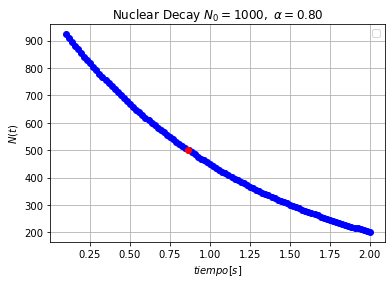

In [18]:
fig, ax = plt.subplots()

p1 = ax.plot(t, y, 'bo') # Deben tener la misma dimension
p2 = ax.plot(np.log(2)/alpha, 0.5*N0, 'ro')

ax.set(xlabel = r'$tiempo[s]$', ylabel = r'$N(t)$', title=r'$\mathrm{Nuclear \ Decay} \ N_{0}=%.0f, \ \alpha = %.2f$' %(N0,alpha))

ax.grid()
ax.legend()

plt.savefig('Figures/Decay.pdf')
plt.show()

## Vamos a crear nuestra primera anim!

In [23]:
filenames = []

def CreateFig(alpha_, it):
    
    t = np.linspace(0.01,10.,50)
    y = Funcion(t,N0,alpha_)
    
    mean = np.log(2)/alpha_
    
    fig, ax = plt.subplots()
    p1 = ax.plot(t,y,'bo')
    p2 = ax.plot(mean, 0.5*N0, 'ro')
    
    ax.set_xlim(0.,10.)
    ax.set_ylim(0.,1000.)
    
    ax.set(xlabel = 'tiempo[s]',
        ylabel = 'N(t)',
        title =r'$\mathrm{Nuclear \ Decay: %.0f} \ N_{0}=%.0f, \ \alpha=%.2f \ \mu=%.3f$' %(it, N0, alpha_, mean))
    ax.grid()
    ax.legend()
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [20]:
alpha_test = np.linspace(0.1,1.0,50)
print(alpha_test)

[0.1        0.11836735 0.13673469 0.15510204 0.17346939 0.19183673
 0.21020408 0.22857143 0.24693878 0.26530612 0.28367347 0.30204082
 0.32040816 0.33877551 0.35714286 0.3755102  0.39387755 0.4122449
 0.43061224 0.44897959 0.46734694 0.48571429 0.50408163 0.52244898
 0.54081633 0.55918367 0.57755102 0.59591837 0.61428571 0.63265306
 0.65102041 0.66938776 0.6877551  0.70612245 0.7244898  0.74285714
 0.76122449 0.77959184 0.79795918 0.81632653 0.83469388 0.85306122
 0.87142857 0.88979592 0.90816327 0.92653061 0.94489796 0.96326531
 0.98163265 1.        ]


In [24]:
num_fig = 0

for i in alpha_test:
    CreateFig(i,num_fig)
    num_fig += 1
    print(num_fig-1,i)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


0 0.1


No handles with labels found to put in legend.


1 0.11836734693877551


No handles with labels found to put in legend.


2 0.13673469387755102


No handles with labels found to put in legend.


3 0.15510204081632656


No handles with labels found to put in legend.


4 0.17346938775510207


No handles with labels found to put in legend.


5 0.19183673469387758


No handles with labels found to put in legend.


6 0.21020408163265308


No handles with labels found to put in legend.


7 0.2285714285714286


No handles with labels found to put in legend.


8 0.2469387755102041


No handles with labels found to put in legend.


9 0.2653061224489796


No handles with labels found to put in legend.


10 0.2836734693877551


No handles with labels found to put in legend.


11 0.3020408163265306


No handles with labels found to put in legend.


12 0.3204081632653062


No handles with labels found to put in legend.


13 0.3387755102040817


No handles with labels found to put in legend.


14 0.3571428571428572


No handles with labels found to put in legend.


15 0.3755102040816327


No handles with labels found to put in legend.


16 0.3938775510204082


No handles with labels found to put in legend.


17 0.41224489795918373


No handles with labels found to put in legend.


18 0.43061224489795924


No handles with labels found to put in legend.


19 0.44897959183673475


No handles with labels found to put in legend.


20 0.46734693877551026


No handles with labels found to put in legend.


21 0.48571428571428577


No handles with labels found to put in legend.


22 0.5040816326530613


No handles with labels found to put in legend.


23 0.5224489795918368


No handles with labels found to put in legend.


24 0.5408163265306123


No handles with labels found to put in legend.


25 0.5591836734693878


No handles with labels found to put in legend.


26 0.5775510204081633


No handles with labels found to put in legend.


27 0.5959183673469388


No handles with labels found to put in legend.


28 0.6142857142857143


No handles with labels found to put in legend.


29 0.6326530612244898


No handles with labels found to put in legend.


30 0.6510204081632653


No handles with labels found to put in legend.


31 0.6693877551020408


No handles with labels found to put in legend.


32 0.6877551020408164


No handles with labels found to put in legend.


33 0.7061224489795919


No handles with labels found to put in legend.


34 0.7244897959183674


No handles with labels found to put in legend.


35 0.7428571428571429


No handles with labels found to put in legend.


36 0.7612244897959184


No handles with labels found to put in legend.


37 0.7795918367346939


No handles with labels found to put in legend.


38 0.7979591836734694


No handles with labels found to put in legend.


39 0.8163265306122449


No handles with labels found to put in legend.


40 0.8346938775510204


No handles with labels found to put in legend.


41 0.8530612244897959


No handles with labels found to put in legend.


42 0.8714285714285714


No handles with labels found to put in legend.


43 0.889795918367347


No handles with labels found to put in legend.


44 0.9081632653061225


No handles with labels found to put in legend.


45 0.926530612244898


No handles with labels found to put in legend.


46 0.9448979591836735


No handles with labels found to put in legend.


47 0.963265306122449


No handles with labels found to put in legend.


48 0.9816326530612246
49 1.0


In [27]:
!convert Figures/* -loop 0 -delay 200 decay.gif
!rm Figures/*
!echo '--- Creating gif ---'

Par metro no v lido: /
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


'--- Creating gif ---'
